# Sentiment based on tweet frequency

Outputs overall sentiment (with rounded polarity) and sentiment over time (frequency bins).
Also has function for computing overall average sentiment.

TODO: convert to script

There are 407,489 tweets that need to be split up

In [32]:
import os # creating directories
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
# load cleaned tweet corpus data
df = pd.read_csv("../datain/sentiment/cleaned_tweets_for_sentiment.csv")
df = df.drop("Unnamed: 0", axis=1)
df

,created_at,id,cleaned_tweet
0,2021-05-31 23:59:42+00:00,1399515966774530048,good project
1,2021-05-31 23:59:40+00:00,1399515957362450432,great project! reset
2,2021-05-31 23:59:35+00:00,1399515936093204480,such a beautiful project and congratulations t...
3,2021-05-31 23:58:47+00:00,1399515734007447552,i am participating in the cryptoultraman nft a...
4,2021-05-31 23:58:44+00:00,1399515723274280960,"nice to find this project, this project will b..."
...,...,...,...
407484,2021-02-01 11:31:45+00:00,1356203583193063424,dena great
407485,2021-02-01 11:05:55+00:00,1356197080272752640,join gays dena
407486,2021-02-01 10:49:53+00:00,1356193045817872384,a great project
407487,2021-02-01 09:29:19+00:00,1356172769424244736,how are nft rates determined? higher nft chanc...


# Clean data

In [34]:
# remove all null created_at values from dataframe
df = df.drop(df[df['created_at'].isnull()].index)
df = df.drop(df[df['cleaned_tweet'].isnull()].index)
# ensure that all values in created_at has 2021 (and not random strings)
df = df[df['created_at'].str.contains("2021")]

In [35]:
# split created_at into date and time columns
# https://intellipaat.com/community/13909/python-how-can-i-split-a-column-with-both-date-and-time-e-g-2019-07-02-00-12-32-utc-into-two-separate-columns
df['created_at'] = pd.to_datetime(df['created_at'])
df['date'] = df['created_at'].dt.date
df['time'] = df['created_at'].dt.time

In [37]:
df[df["cleaned_tweet"].isnull()]

,created_at,id,cleaned_tweet,date,time


In [38]:
df.dtypes

created_at       datetime64[ns, UTC]
id                             int64
cleaned_tweet                 object
date                          object
time                          object
dtype: object

# Sentiment: apply polarity score

In [39]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [40]:
analyzer = SentimentIntensityAnalyzer()

In [41]:
# add polarity scores to df
# https://github.com/sidneykung/twitter_hate_speech_detection/blob/master/preprocessing/VADER_sentiment.ipynb
pol = lambda x: analyzer.polarity_scores(x)
df['polarity'] = df["cleaned_tweet"].apply(pol)
df

,created_at,id,cleaned_tweet,date,time,polarity
0,2021-05-31 23:59:42+00:00,1399515966774530048,good project,2021-05-31,23:59:42,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp..."
1,2021-05-31 23:59:40+00:00,1399515957362450432,great project! reset,2021-05-31,23:59:40,"{'neg': 0.0, 'neu': 0.313, 'pos': 0.687, 'comp..."
2,2021-05-31 23:59:35+00:00,1399515936093204480,such a beautiful project and congratulations t...,2021-05-31,23:59:35,"{'neg': 0.0, 'neu': 0.463, 'pos': 0.537, 'comp..."
3,2021-05-31 23:58:47+00:00,1399515734007447552,i am participating in the cryptoultraman nft a...,2021-05-31,23:58:47,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,2021-05-31 23:58:44+00:00,1399515723274280960,"nice to find this project, this project will b...",2021-05-31,23:58:44,"{'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'comp..."
...,...,...,...,...,...,...
407484,2021-02-01 11:31:45+00:00,1356203583193063424,dena great,2021-02-01,11:31:45,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp..."
407485,2021-02-01 11:05:55+00:00,1356197080272752640,join gays dena,2021-02-01,11:05:55,"{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'comp..."
407486,2021-02-01 10:49:53+00:00,1356193045817872384,a great project,2021-02-01,10:49:53,"{'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'comp..."
407487,2021-02-01 09:29:19+00:00,1356172769424244736,how are nft rates determined? higher nft chanc...,2021-02-01,09:29:19,"{'neg': 0.153, 'neu': 0.589, 'pos': 0.258, 'co..."


In [42]:
# split polarity scores into separate columns
df = pd.concat([df.drop(['polarity'], axis=1), df['polarity'].apply(pd.Series)], axis=1)
df

,created_at,id,cleaned_tweet,date,time,neg,neu,pos,compound
0,2021-05-31 23:59:42+00:00,1399515966774530048,good project,2021-05-31,23:59:42,0.000,0.256,0.744,0.4404
1,2021-05-31 23:59:40+00:00,1399515957362450432,great project! reset,2021-05-31,23:59:40,0.000,0.313,0.687,0.6588
2,2021-05-31 23:59:35+00:00,1399515936093204480,such a beautiful project and congratulations t...,2021-05-31,23:59:35,0.000,0.463,0.537,0.9677
3,2021-05-31 23:58:47+00:00,1399515734007447552,i am participating in the cryptoultraman nft a...,2021-05-31,23:58:47,0.000,1.000,0.000,0.0000
4,2021-05-31 23:58:44+00:00,1399515723274280960,"nice to find this project, this project will b...",2021-05-31,23:58:44,0.000,0.659,0.341,0.8860
...,...,...,...,...,...,...,...,...,...
407484,2021-02-01 11:31:45+00:00,1356203583193063424,dena great,2021-02-01,11:31:45,0.000,0.196,0.804,0.6249
407485,2021-02-01 11:05:55+00:00,1356197080272752640,join gays dena,2021-02-01,11:05:55,0.000,0.476,0.524,0.2960
407486,2021-02-01 10:49:53+00:00,1356193045817872384,a great project,2021-02-01,10:49:53,0.000,0.328,0.672,0.6249
407487,2021-02-01 09:29:19+00:00,1356172769424244736,how are nft rates determined? higher nft chanc...,2021-02-01,09:29:19,0.153,0.589,0.258,0.3736


## Sentiment: round polarity

In [43]:
def calc_polarity(x, bound):
    if x < -bound:
        return -1
    elif x > bound:
        return 1
    else:
        return 0

round_pol = lambda x: calc_polarity(x, 0.05)

In [44]:
# round polarity up/down
df['rounded_polarity'] = df['compound'].apply(round_pol)
df

,created_at,id,cleaned_tweet,date,time,neg,neu,pos,compound,rounded_polarity
0,2021-05-31 23:59:42+00:00,1399515966774530048,good project,2021-05-31,23:59:42,0.000,0.256,0.744,0.4404,1
1,2021-05-31 23:59:40+00:00,1399515957362450432,great project! reset,2021-05-31,23:59:40,0.000,0.313,0.687,0.6588,1
2,2021-05-31 23:59:35+00:00,1399515936093204480,such a beautiful project and congratulations t...,2021-05-31,23:59:35,0.000,0.463,0.537,0.9677,1
3,2021-05-31 23:58:47+00:00,1399515734007447552,i am participating in the cryptoultraman nft a...,2021-05-31,23:58:47,0.000,1.000,0.000,0.0000,0
4,2021-05-31 23:58:44+00:00,1399515723274280960,"nice to find this project, this project will b...",2021-05-31,23:58:44,0.000,0.659,0.341,0.8860,1
...,...,...,...,...,...,...,...,...,...,...
407484,2021-02-01 11:31:45+00:00,1356203583193063424,dena great,2021-02-01,11:31:45,0.000,0.196,0.804,0.6249,1
407485,2021-02-01 11:05:55+00:00,1356197080272752640,join gays dena,2021-02-01,11:05:55,0.000,0.476,0.524,0.2960,1
407486,2021-02-01 10:49:53+00:00,1356193045817872384,a great project,2021-02-01,10:49:53,0.000,0.328,0.672,0.6249,1
407487,2021-02-01 09:29:19+00:00,1356172769424244736,how are nft rates determined? higher nft chanc...,2021-02-01,09:29:19,0.153,0.589,0.258,0.3736,1


Text(0.5, 0, 'Tweets')

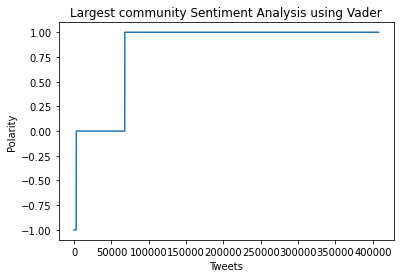

In [45]:
# plot rounded polarity
plt.plot(df.index, df['rounded_polarity'].sort_values())
plt.title('Largest community Sentiment Analysis using Vader')
plt.ylabel('Polarity')
plt.xlabel('Tweets')

In [46]:
# get amount of rounded negative, neutral, and positive polarity
num_rounded_sentiments = df.groupby('rounded_polarity').count()
num_rounded_sentiments

,created_at,id,cleaned_tweet,date,time,neg,neu,pos,compound
rounded_polarity,,,,,,,,,
-1,2889,2889,2889,2889,2889,2889,2889,2889,2889
0,64912,64912,64912,64912,64912,64912,64912,64912,64912
1,338764,338764,338764,338764,338764,338764,338764,338764,338764


In [47]:
# plot rounded negative, neutral, and positive sentiment amounts
plt.bar(num_rounded_sentiments.index, num_rounded_sentiments["compound"])
plt.title('Rounded Overall Sentiment')
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.savefig('../dataout/sentiment/rounded_overall_sentiment.jpeg')
plt.close()

# Split data into segments

In [48]:
# sort dataframe by date
df = df.sort_values(by=['date', 'time'])
df

,created_at,id,cleaned_tweet,date,time,neg,neu,pos,compound,rounded_polarity
407488,2021-02-01 03:58:29+00:00,1356089513857208320,nft friends,2021-02-01,03:58:29,0.000,0.244,0.756,0.4767,1
407487,2021-02-01 09:29:19+00:00,1356172769424244736,how are nft rates determined? higher nft chanc...,2021-02-01,09:29:19,0.153,0.589,0.258,0.3736,1
407486,2021-02-01 10:49:53+00:00,1356193045817872384,a great project,2021-02-01,10:49:53,0.000,0.328,0.672,0.6249,1
407485,2021-02-01 11:05:55+00:00,1356197080272752640,join gays dena,2021-02-01,11:05:55,0.000,0.476,0.524,0.2960,1
407484,2021-02-01 11:31:45+00:00,1356203583193063424,dena great,2021-02-01,11:31:45,0.000,0.196,0.804,0.6249,1
...,...,...,...,...,...,...,...,...,...,...
4,2021-05-31 23:58:44+00:00,1399515723274280960,"nice to find this project, this project will b...",2021-05-31,23:58:44,0.000,0.659,0.341,0.8860,1
3,2021-05-31 23:58:47+00:00,1399515734007447552,i am participating in the cryptoultraman nft a...,2021-05-31,23:58:47,0.000,1.000,0.000,0.0000,0
2,2021-05-31 23:59:35+00:00,1399515936093204480,such a beautiful project and congratulations t...,2021-05-31,23:59:35,0.000,0.463,0.537,0.9677,1
1,2021-05-31 23:59:40+00:00,1399515957362450432,great project! reset,2021-05-31,23:59:40,0.000,0.313,0.687,0.6588,1


In [49]:
NUM_SEGMENTS = 40

In [50]:
# split df into n groups of equal length (returns list of sub dataframes)
# https://stackoverflow.com/questions/2130016/splitting-a-list-into-n-parts-of-approximately-equal-length
def split(a, n):
    k, m = divmod(len(a), n)
    return (a[i*k+min(i, m):(i+1)*k+min(i+1, m)] for i in range(n))

In [51]:
# list of dfs
sub_dfs = list(split(df, NUM_SEGMENTS))
sub_dfs

[                      created_at                   id  \
 407488 2021-02-01 03:58:29+00:00  1356089513857208320   
 407487 2021-02-01 09:29:19+00:00  1356172769424244736   
 407486 2021-02-01 10:49:53+00:00  1356193045817872384   
 407485 2021-02-01 11:05:55+00:00  1356197080272752640   
 407484 2021-02-01 11:31:45+00:00  1356203583193063424   
 ...                          ...                  ...   
 397307 2021-03-17 20:26:44+00:00  1372283279462723584   
 397306 2021-03-17 20:30:33+00:00  1372284242160418816   
 397305 2021-03-17 20:32:15+00:00  1372284669312393216   
 397304 2021-03-17 20:33:15+00:00  1372284921444720640   
 397303 2021-03-17 20:37:09+00:00  1372285902798651392   
 
                                             cleaned_tweet        date  \
 407488                                        nft friends  2021-02-01   
 407487  how are nft rates determined? higher nft chanc...  2021-02-01   
 407486                                    a great project  2021-02-01   
 40748

In [52]:
sub_dfs[0]

,created_at,id,cleaned_tweet,date,time,neg,neu,pos,compound,rounded_polarity
407488,2021-02-01 03:58:29+00:00,1356089513857208320,nft friends,2021-02-01,03:58:29,0.000,0.244,0.756,0.4767,1
407487,2021-02-01 09:29:19+00:00,1356172769424244736,how are nft rates determined? higher nft chanc...,2021-02-01,09:29:19,0.153,0.589,0.258,0.3736,1
407486,2021-02-01 10:49:53+00:00,1356193045817872384,a great project,2021-02-01,10:49:53,0.000,0.328,0.672,0.6249,1
407485,2021-02-01 11:05:55+00:00,1356197080272752640,join gays dena,2021-02-01,11:05:55,0.000,0.476,0.524,0.2960,1
407484,2021-02-01 11:31:45+00:00,1356203583193063424,dena great,2021-02-01,11:31:45,0.000,0.196,0.804,0.6249,1
...,...,...,...,...,...,...,...,...,...,...
397307,2021-03-17 20:26:44+00:00,1372283279462723584,please i need this nft,2021-03-17,20:26:44,0.000,0.635,0.365,0.3182,1
397306,2021-03-17 20:30:33+00:00,1372284242160418816,nft trending vibes,2021-03-17,20:30:33,0.000,1.000,0.000,0.0000,0
397305,2021-03-17 20:32:15+00:00,1372284669312393216,"look this in , will make u rich..",2021-03-17,20:32:15,0.000,0.660,0.340,0.5574,1
397304,2021-03-17 20:33:15+00:00,1372284921444720640,click my sponsor link to claim your free plati...,2021-03-17,20:33:15,0.000,0.736,0.264,0.5562,1


# Sentiment analysis per segment

In [53]:
def get_avg_segment_sentiment(df):
    sumsentiment = 0
    count = 0
    for i in range(len(df.index)):
        sumsentiment += df['compound'].iloc[i]
        count += 1
    return sumsentiment / count

In [20]:
# compounds = []
# firstcol = []
# for sub_df in sub_dfs:
    
#     print(sub_df.compound.mean())
#     get_avg_segment_sentiment(sub_df)

In [55]:
compounds = []
mns, mxs = [], []
dates = []
for sub_df in sub_dfs:
    compounds.append(sub_df.compound.mean())
    mxs.append(sub_df.index.max())
    mns.append(sub_df.index.min())
    dates.append(sub_df.date.iloc[0])

compound_df = pd.DataFrame(dict(
    mn=mns,
    mx=mxs,
    compouned=compounds,
    date=dates,
))

In [56]:
compound_df

,mn,mx,compouned,date
0,397303,407488,0.620325,2021-02-01
1,387137,397302,0.817376,2021-03-17
2,376966,387136,0.822240,2021-03-20
3,366767,376965,0.726567,2021-03-21
4,356492,366766,0.658903,2021-03-27
5,346311,356491,0.585611,2021-04-04
6,336024,346310,0.608715,2021-04-08
7,325840,336023,0.540375,2021-04-15
8,315662,325839,0.438953,2021-04-20
9,305481,315661,0.429945,2021-04-24


In [69]:
DATA_OUT = '../dataout/sentiment/sentiment_per_segment.jpeg'

In [70]:
import matplotlib.dates as mdates

fig, ax = plt.subplots()
ax.plot(compound_df.date, 'compouned', data=compound_df)

# Major ticks every month.
fmt_month = mdates.MonthLocator()

ax.xaxis.set_major_locator(fmt_month)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

#plot
plt.title('Sentiment per segment overall (40 segments of ~10k)')
plt.xlabel('Date')
plt.ylabel('Vader Sentiment score')
# save plot to output
plt.savefig(DATA_OUT)
plt.close()

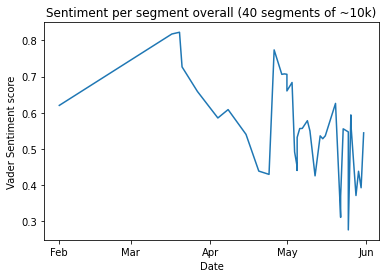

In [71]:
fig

# Get overall average sentiment

In [30]:
avg_sentiment = df['compound'].mean()
avg_sentiment

0.5566739261864646